#Importing Libraries and Loading Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('East_African_countries_data.csv')

print("Data loaded successfully. First 5 rows:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

Data loaded successfully. First 5 rows:
| psu   | new_psu   | country   | DHSCLUST   | sampwt   | newcaseid_1   | anc_timing   | residence   | education_1          | birth_order   | wealth   | household_size_g   | household_sex   | age_group_new_cat   |
|:------|:----------|:----------|:-----------|:---------|:--------------|:-------------|:------------|:---------------------|:--------------|:---------|:-------------------|:----------------|:--------------------|
| 1     | 1         | DRC       | 1          | 1.0981   | 1 7 4         | early        | urban       | secondary and higher | one           | rich     | 5 or more          | male            | 15-24               |
| 1     | 1         | DRC       | 1          | 1.0981   | 1 19 2        | late         | urban       | secondary and higher | two           | rich     | 5 or more          | male            | 25-49               |
| 1     | 1         | DRC       | 1          | 1.0981   | 1 45 5        | early        | urban       | s

In [2]:
print("\nInformation about the dataset (data types and non-null counts):")
df.info()

print("\nChecking for missing values (sum per column):")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))


Information about the dataset (data types and non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42719 entries, 0 to 42718
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   psu                42719 non-null  int64  
 1   new_psu            42719 non-null  int64  
 2   country            42719 non-null  object 
 3   DHSCLUST           42719 non-null  int64  
 4   sampwt             42719 non-null  float64
 5   newcaseid_1        42719 non-null  object 
 6   anc_timing         42719 non-null  object 
 7   residence          42719 non-null  object 
 8   education_1        42719 non-null  object 
 9   birth_order        42719 non-null  object 
 10  wealth             42719 non-null  object 
 11  household_size_g   42719 non-null  object 
 12  household_sex      42719 non-null  object 
 13  age_group_new_cat  42719 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 4.6

#Descriptive Statistics for Numerical and Categorical Columns

In [5]:
print("\nDescriptive statistics for numerical columns:")
print(df.describe().to_markdown(numalign="left", stralign="left"))

print("\nValue counts for key categorical columns:")
categorical_cols = ['country', 'anc_timing', 'residence', 'education_1', 'birth_order', 'wealth', 'household_size_g', 'household_sex', 'age_group_new_cat']

for col in categorical_cols:
    print(f"\n--- Value counts for '{col}' ---")
    print(df[col].value_counts().to_markdown(numalign="left", stralign="left"))


Descriptive statistics for numerical columns:
|       | psu     | new_psu   | DHSCLUST   | sampwt   |
|:------|:--------|:----------|:-----------|:---------|
| count | 42719   | 42719     | 42719      | 42719    |
| mean  | 446.175 | 1777.82   | 446.175    | 1.00625  |
| std   | 403.998 | 1197.2    | 403.998    | 0.876412 |
| min   | 1       | 1         | 1          | 0.027451 |
| 25%   | 163     | 627       | 163        | 0.428642 |
| 50%   | 319     | 1723      | 319        | 0.818634 |
| 75%   | 531     | 2879      | 531        | 1.28791  |
| max   | 1612    | 3805      | 1612       | 13.5635  |

Value counts for key categorical columns:

--- Value counts for 'country' ---
| country   | count   |
|:----------|:--------|
| KEN       | 17288   |
| DRC       | 13500   |
| TZA       | 11931   |

--- Value counts for 'anc_timing' ---
| anc_timing   | count   |
|:-------------|:--------|
| late         | 25497   |
| early        | 17222   |

--- Value counts for 'residence' ---
| residen

#Visualizing Distributions of Key Categorical Variables

/tmp/ipython-input-6-512179424.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
/tmp/ipython-input-6-512179424.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
/tmp/ipython-input-6-512179424.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
/tmp/ipython-input-6-512179424.py:10: FutureWarning: 

Passing `palette` wit

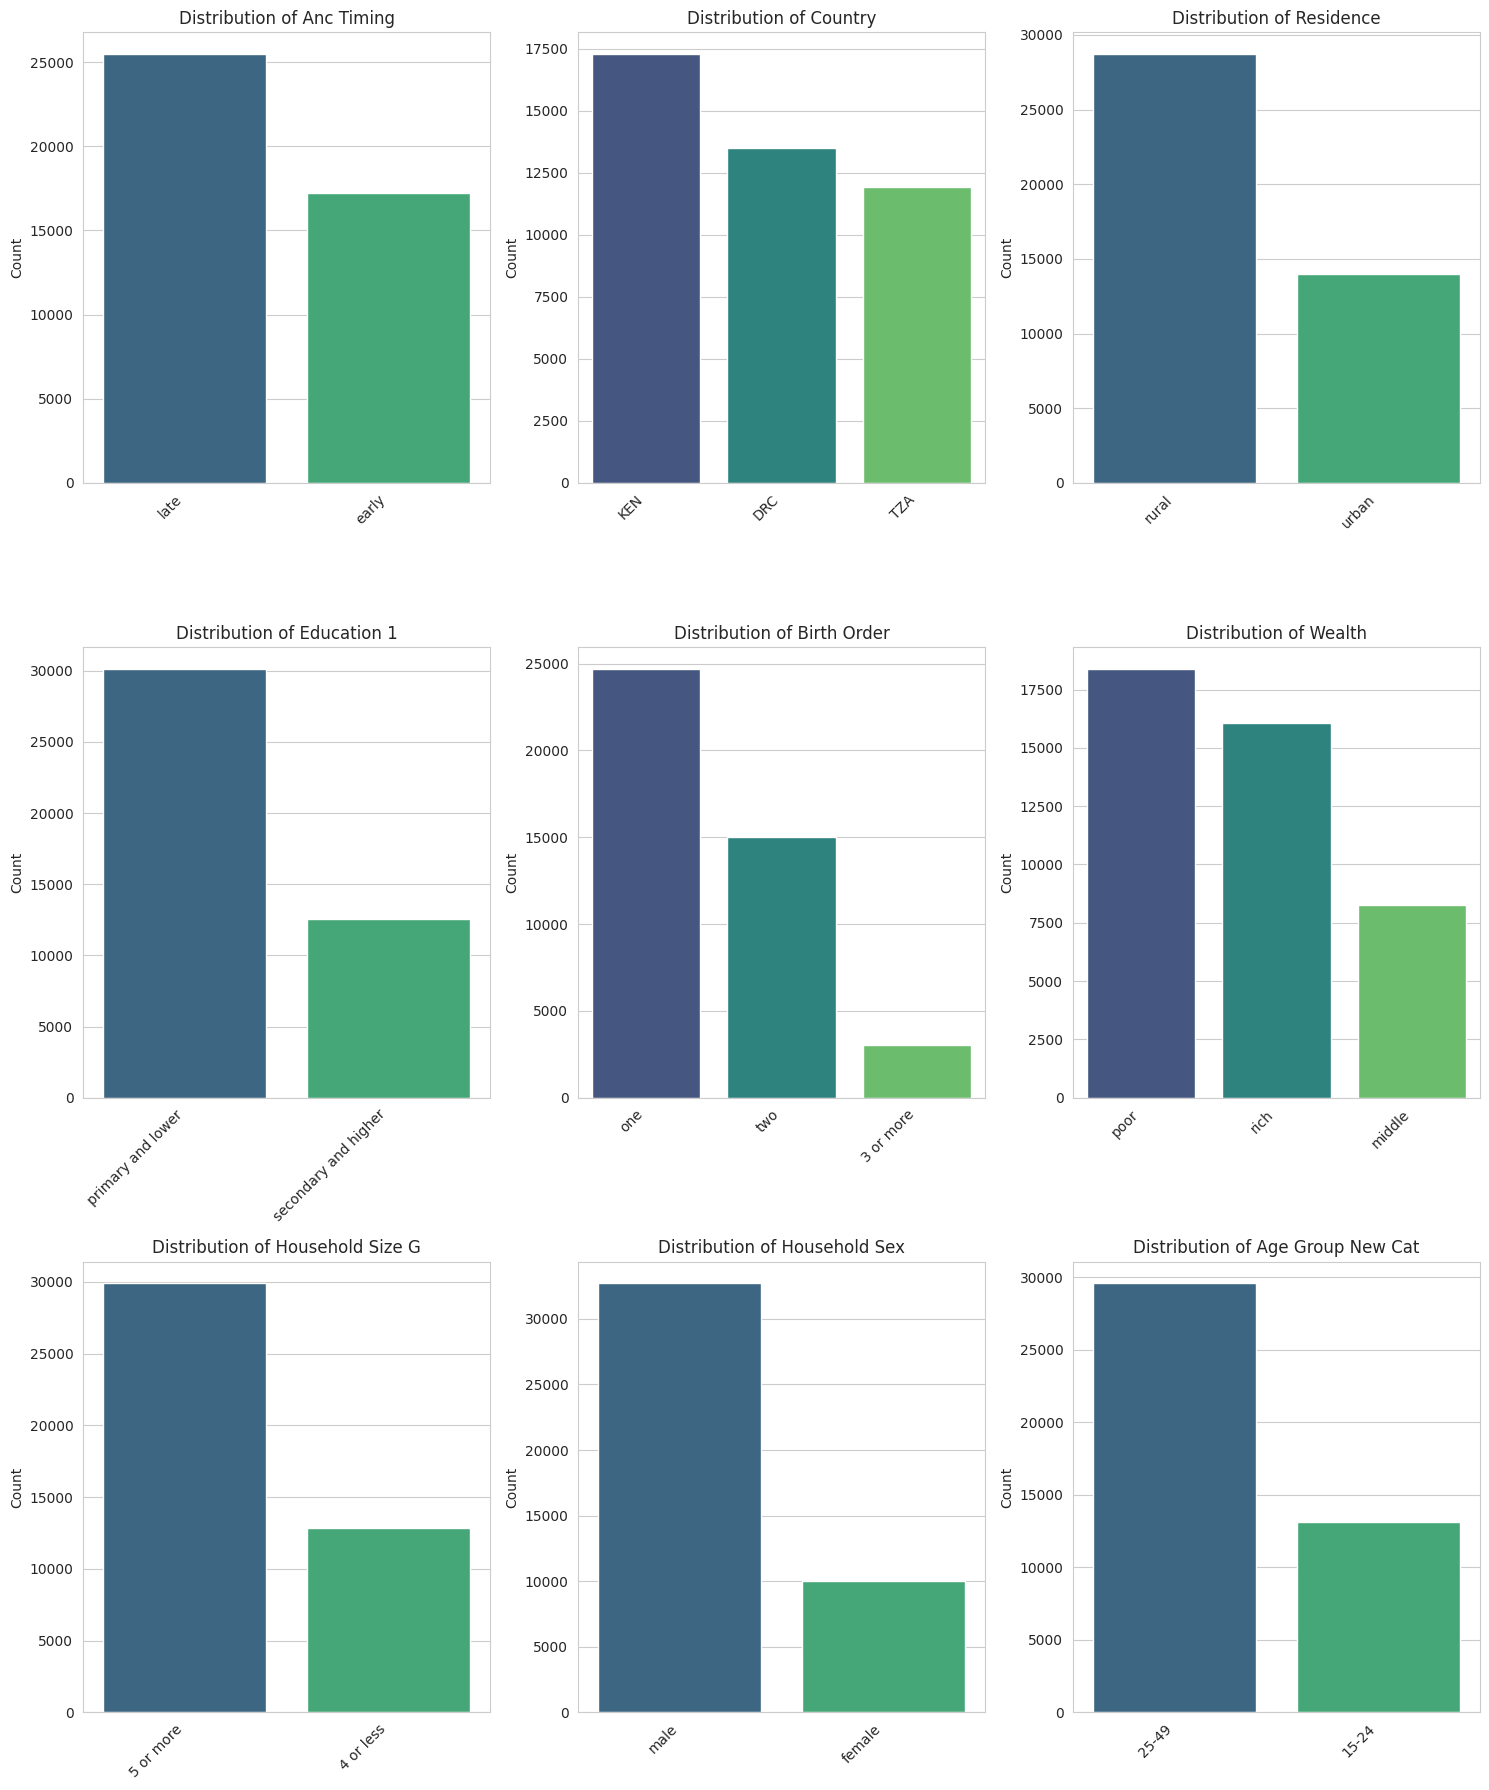

In [6]:
# Set a style for the plots
sns.set_style("whitegrid")

# Define the list of categorical columns for visualization
categorical_cols_for_viz = ['anc_timing', 'country', 'residence', 'education_1', 'birth_order', 'wealth', 'household_size_g', 'household_sex', 'age_group_new_cat']

plt.figure(figsize=(15, 18))
for i, col in enumerate(categorical_cols_for_viz):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
    plt.title(f'Distribution of {col.replace("_", " ").title()}', fontsize=12)
    plt.xlabel('') # Remove x-axis label to clean up
    plt.ylabel('Count', fontsize=10)
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from scipy.stats import randint

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Libraries imported successfully!")

Libraries imported successfully!


In [8]:
# Make sure to upload 'East_African_countries_data.csv' to your Colab environment
# or mount your Google Drive if the file is there.
try:
    df = pd.read_csv('East_African_countries_data.csv')
    print("Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    print("\nFirst 5 rows of the dataset:")
    print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
except FileNotFoundError:
    print("Error: 'East_African_countries_data.csv' not found. Please upload the file to your Colab environment or provide the correct path.")
    # In a real notebook, you might want to exit or raise an exception if the file is essential
    # raise SystemExit("Dataset file not found.")

Dataset loaded successfully!
Dataset shape: (42719, 14)

First 5 rows of the dataset:
| psu   | new_psu   | country   | DHSCLUST   | sampwt   | newcaseid_1   | anc_timing   | residence   | education_1          | birth_order   | wealth   | household_size_g   | household_sex   | age_group_new_cat   |
|:------|:----------|:----------|:-----------|:---------|:--------------|:-------------|:------------|:---------------------|:--------------|:---------|:-------------------|:----------------|:--------------------|
| 1     | 1         | DRC       | 1          | 1.0981   | 1 7 4         | early        | urban       | secondary and higher | one           | rich     | 5 or more          | male            | 15-24               |
| 1     | 1         | DRC       | 1          | 1.0981   | 1 19 2        | late         | urban       | secondary and higher | two           | rich     | 5 or more          | male            | 25-49               |
| 1     | 1         | DRC       | 1          | 1.0981   | 

In [9]:
print("\n--- Dataset Information ---")
df.info()

print("\n--- Missing Values Check ---")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))

print("\n--- Summary Statistics for Numerical Columns ---")
print(df.describe().to_markdown(numalign="left", stralign="left"))

print("\n--- Summary Statistics for Categorical Columns ---")
print(df.describe(include='object').to_markdown(numalign="left", stralign="left"))


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42719 entries, 0 to 42718
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   psu                42719 non-null  int64  
 1   new_psu            42719 non-null  int64  
 2   country            42719 non-null  object 
 3   DHSCLUST           42719 non-null  int64  
 4   sampwt             42719 non-null  float64
 5   newcaseid_1        42719 non-null  object 
 6   anc_timing         42719 non-null  object 
 7   residence          42719 non-null  object 
 8   education_1        42719 non-null  object 
 9   birth_order        42719 non-null  object 
 10  wealth             42719 non-null  object 
 11  household_size_g   42719 non-null  object 
 12  household_sex      42719 non-null  object 
 13  age_group_new_cat  42719 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 4.6+ MB

--- Missing Values Check ---
|

#EDA
Distribution of Target Variable 'anc_timing'

--- Distribution of 'anc_timing' ---
| anc_timing   | count   |
|:-------------|:--------|
| late         | 25497   |
| early        | 17222   |


/tmp/ipython-input-11-602412978.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='anc_timing', palette='viridis', order=df['anc_timing'].value_counts().index)


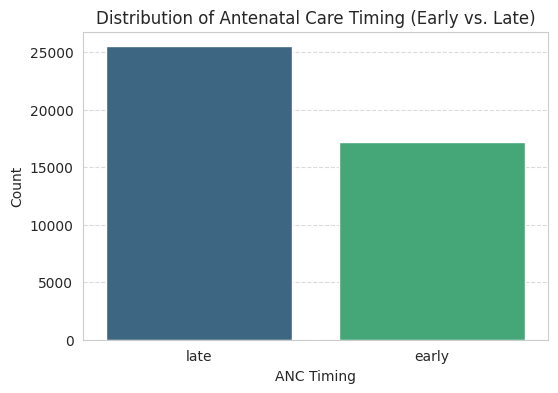

In [11]:
print("--- Distribution of 'anc_timing' ---")
anc_timing_counts = df['anc_timing'].value_counts()
print(anc_timing_counts.to_markdown(numalign="left", stralign="left"))

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='anc_timing', palette='viridis', order=df['anc_timing'].value_counts().index)
plt.title('Distribution of Antenatal Care Timing (Early vs. Late)')
plt.xlabel('ANC Timing')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

 Relationship between 'country' and 'anc_timing'


--- Relationship between 'country' and 'anc_timing' ---
| country   | early   | late   |
|:----------|:--------|:-------|
| DRC       | 5438    | 8062   |
| KEN       | 6474    | 10814  |
| TZA       | 5310    | 6621   |


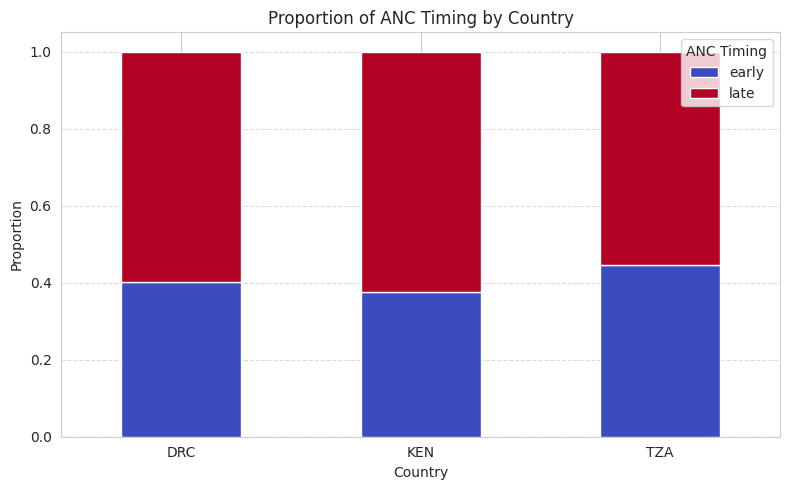

In [12]:
print("\n--- Relationship between 'country' and 'anc_timing' ---")
country_anc_timing_counts = df.groupby(['country', 'anc_timing']).size().unstack(fill_value=0)
print(country_anc_timing_counts.to_markdown(numalign="left", stralign="left"))


country_anc_timing_percent = country_anc_timing_counts.apply(lambda x: x / x.sum(), axis=1)
plt.figure(figsize=(8, 5))
country_anc_timing_percent.plot(kind='bar', stacked=True, cmap='coolwarm', ax=plt.gca())
plt.title('Proportion of ANC Timing by Country')
plt.xlabel('Country')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='ANC Timing')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Relationship between 'residence' and 'anc_timing'


--- Relationship between 'residence' and 'anc_timing' ---
| residence   | early   | late   |
|:------------|:--------|:-------|
| rural       | 10853   | 17888  |
| urban       | 6369    | 7609   |


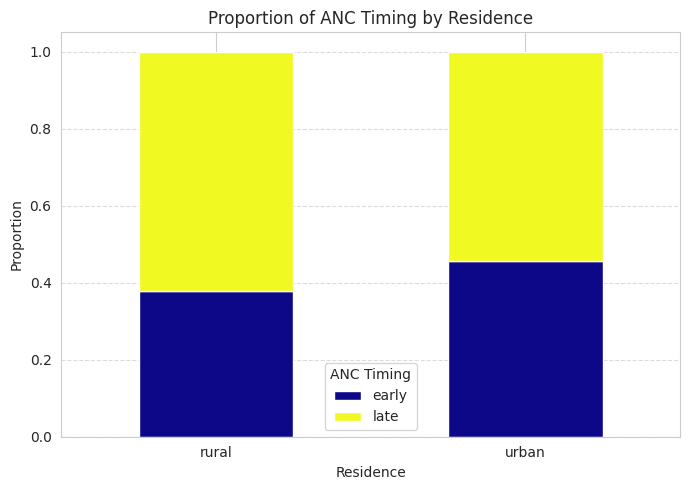

In [13]:
print("\n--- Relationship between 'residence' and 'anc_timing' ---")
residence_anc_timing_counts = df.groupby(['residence', 'anc_timing']).size().unstack(fill_value=0)
print(residence_anc_timing_counts.to_markdown(numalign="left", stralign="left"))


residence_anc_timing_percent = residence_anc_timing_counts.apply(lambda x: x / x.sum(), axis=1)
plt.figure(figsize=(7, 5))
residence_anc_timing_percent.plot(kind='bar', stacked=True, cmap='plasma', ax=plt.gca())
plt.title('Proportion of ANC Timing by Residence')
plt.xlabel('Residence')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='ANC Timing')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Relationship between 'education_1' and 'anc_timing'


--- Relationship between 'education_1' and 'anc_timing' ---
| education_1          | early   | late   |
|:---------------------|:--------|:-------|
| primary and lower    | 11322   | 18834  |
| secondary and higher | 5900    | 6663   |


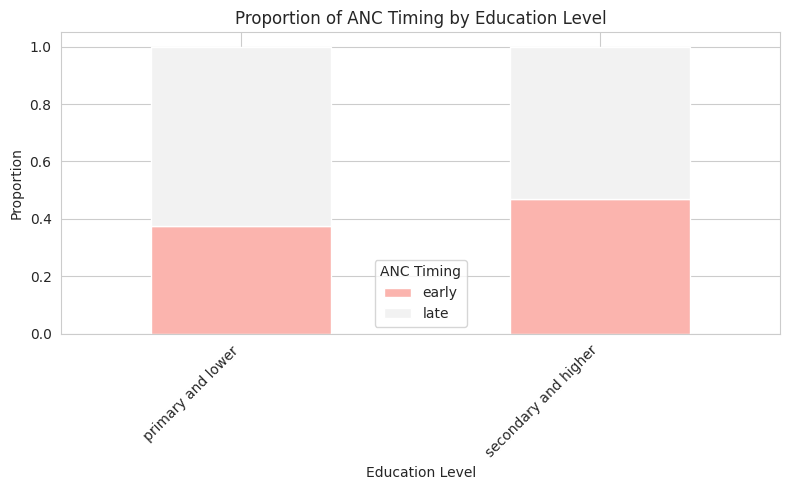

In [14]:
print("\n--- Relationship between 'education_1' and 'anc_timing' ---")
education_anc_timing_counts = df.groupby(['education_1', 'anc_timing']).size().unstack(fill_value=0)
print(education_anc_timing_counts.to_markdown(numalign="left", stralign="left"))

education_anc_timing_percent = education_anc_timing_counts.apply(lambda x: x / x.sum(), axis=1)
plt.figure(figsize=(8, 5))
education_anc_timing_percent.plot(kind='bar', stacked=True, cmap='Pastel1', ax=plt.gca())
plt.title('Proportion of ANC Timing by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='ANC Timing')
plt.tight_layout()
plt.show()


Relationship between 'birth_order' and 'anc_timing'


--- Relationship between 'birth_order' and 'anc_timing' ---
| birth_order   | early   | late   |
|:--------------|:--------|:-------|
| 3 or more     | 946     | 2066   |
| one           | 10845   | 13874  |
| two           | 5431    | 9557   |


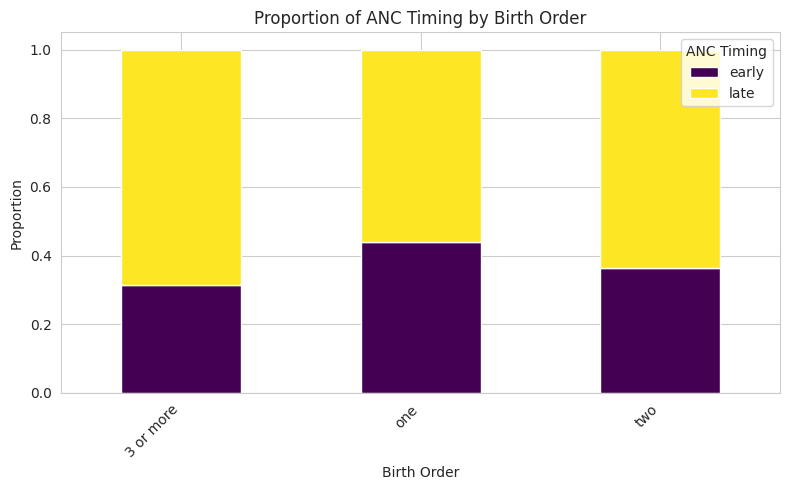

In [15]:
print("\n--- Relationship between 'birth_order' and 'anc_timing' ---")
birth_order_anc_timing_counts = df.groupby(['birth_order', 'anc_timing']).size().unstack(fill_value=0)
print(birth_order_anc_timing_counts.to_markdown(numalign="left", stralign="left"))


birth_order_anc_timing_percent = birth_order_anc_timing_counts.apply(lambda x: x / x.sum(), axis=1)
plt.figure(figsize=(8, 5))
birth_order_anc_timing_percent.plot(kind='bar', stacked=True, cmap='viridis', ax=plt.gca())
plt.title('Proportion of ANC Timing by Birth Order')
plt.xlabel('Birth Order')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='ANC Timing')
plt.tight_layout()
plt.show()

Relationship between 'wealth' and 'anc_timing'


--- Relationship between 'wealth' and 'anc_timing' ---
| wealth   | early   | late   |
|:---------|:--------|:-------|
| middle   | 3157    | 5090   |
| poor     | 6583    | 11818  |
| rich     | 7482    | 8589   |


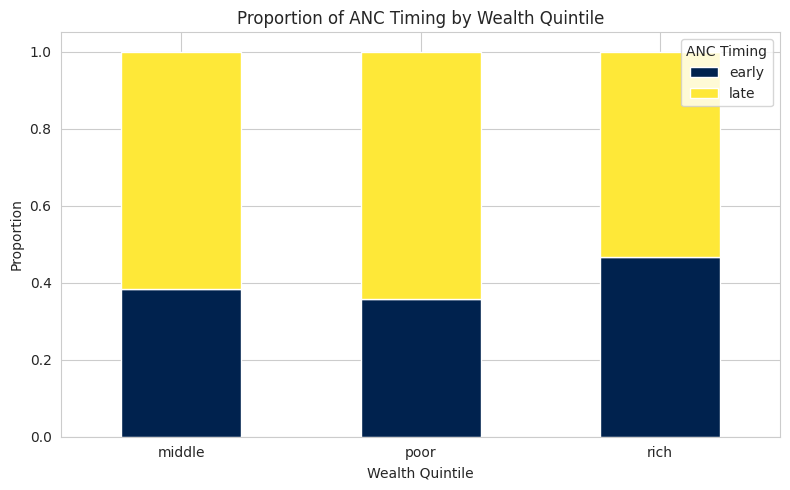

In [16]:
print("\n--- Relationship between 'wealth' and 'anc_timing' ---")
wealth_anc_timing_counts = df.groupby(['wealth', 'anc_timing']).size().unstack(fill_value=0)
print(wealth_anc_timing_counts.to_markdown(numalign="left", stralign="left"))


wealth_anc_timing_percent = wealth_anc_timing_counts.apply(lambda x: x / x.sum(), axis=1)
plt.figure(figsize=(8, 5))
wealth_anc_timing_percent.plot(kind='bar', stacked=True, cmap='cividis', ax=plt.gca())
plt.title('Proportion of ANC Timing by Wealth Quintile')
plt.xlabel('Wealth Quintile')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='ANC Timing')
plt.tight_layout()
plt.show()

Relationship between 'household_size_g' and 'anc_timing'


--- Relationship between 'household_size_g' and 'anc_timing' ---
| household_size_g   | early   | late   |
|:-------------------|:--------|:-------|
| 4 or less          | 5801    | 7023   |
| 5 or more          | 11421   | 18474  |


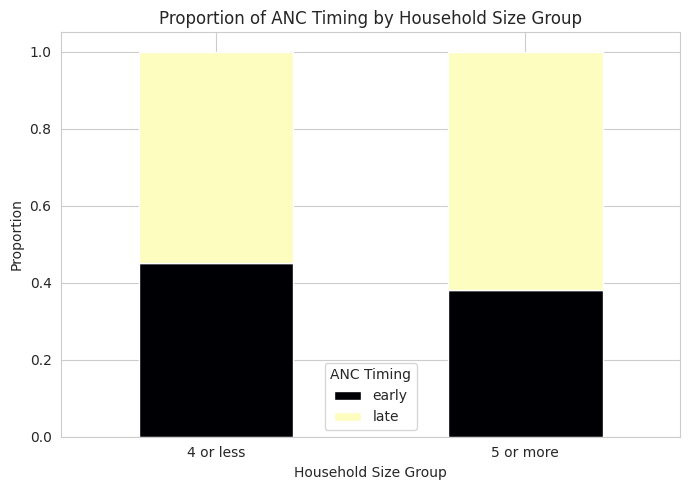

In [17]:
print("\n--- Relationship between 'household_size_g' and 'anc_timing' ---")
household_size_anc_timing_counts = df.groupby(['household_size_g', 'anc_timing']).size().unstack(fill_value=0)
print(household_size_anc_timing_counts.to_markdown(numalign="left", stralign="left"))


household_size_anc_timing_percent = household_size_anc_timing_counts.apply(lambda x: x / x.sum(), axis=1)
plt.figure(figsize=(7, 5))
household_size_anc_timing_percent.plot(kind='bar', stacked=True, cmap='magma', ax=plt.gca())
plt.title('Proportion of ANC Timing by Household Size Group')
plt.xlabel('Household Size Group')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='ANC Timing')
plt.tight_layout()
plt.show()


 Relationship between 'household_sex' and 'anc_timing'


--- Relationship between 'household_sex' and 'anc_timing' ---
| household_sex   | early   | late   |
|:----------------|:--------|:-------|
| female          | 4074    | 5937   |
| male            | 13148   | 19560  |


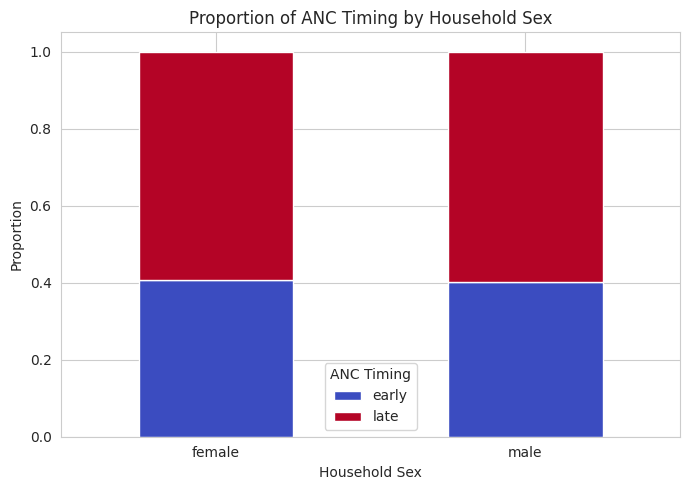

In [18]:
print("\n--- Relationship between 'household_sex' and 'anc_timing' ---")
household_sex_anc_timing_counts = df.groupby(['household_sex', 'anc_timing']).size().unstack(fill_value=0)
print(household_sex_anc_timing_counts.to_markdown(numalign="left", stralign="left"))


household_sex_anc_timing_percent = household_sex_anc_timing_counts.apply(lambda x: x / x.sum(), axis=1)
plt.figure(figsize=(7, 5))
household_sex_anc_timing_percent.plot(kind='bar', stacked=True, cmap='coolwarm', ax=plt.gca())
plt.title('Proportion of ANC Timing by Household Sex')
plt.xlabel('Household Sex')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='ANC Timing')
plt.tight_layout()
plt.show()

Relationship between 'age_group_new_cat' and 'anc_timing'


--- Relationship between 'age_group_new_cat' and 'anc_timing' ---
| age_group_new_cat   | early   | late   |
|:--------------------|:--------|:-------|
| 15-24               | 5498    | 7653   |
| 25-49               | 11724   | 17844  |


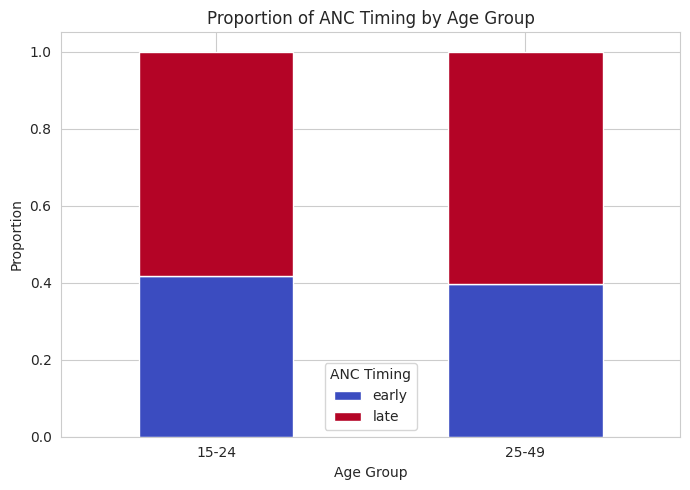

In [19]:
print("\n--- Relationship between 'age_group_new_cat' and 'anc_timing' ---")
age_group_anc_timing_counts = df.groupby(['age_group_new_cat', 'anc_timing']).size().unstack(fill_value=0)
print(age_group_anc_timing_counts.to_markdown(numalign="left", stralign="left"))


age_group_anc_timing_percent = age_group_anc_timing_counts.apply(lambda x: x / x.sum(), axis=1)
plt.figure(figsize=(7, 5))
age_group_anc_timing_percent.plot(kind='bar', stacked=True, cmap='coolwarm', ax=plt.gca())
plt.title('Proportion of ANC Timing by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='ANC Timing')
plt.tight_layout()
plt.show()


--- Distribution of 'sampwt' (Sampling Weight) ---
|       | sampwt   |
|:------|:---------|
| count | 42719    |
| mean  | 1.00625  |
| std   | 0.876412 |
| min   | 0.027451 |
| 25%   | 0.428642 |
| 50%   | 0.818634 |
| 75%   | 1.28791  |
| max   | 13.5635  |


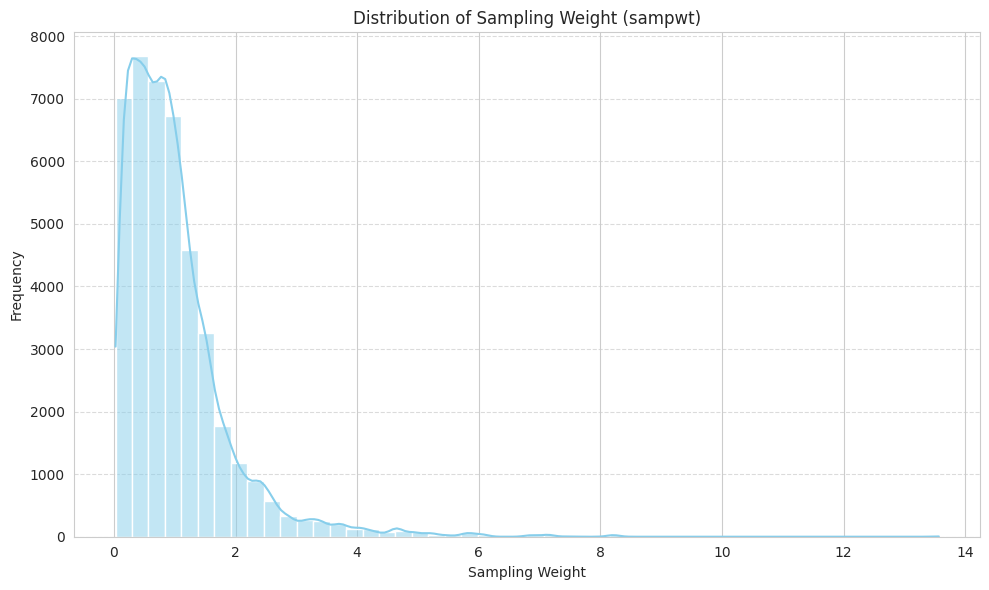

In [21]:
print("\n--- Distribution of 'sampwt' (Sampling Weight) ---")
print(df['sampwt'].describe().to_markdown(numalign="left", stralign="left"))


plt.figure(figsize=(10, 6))
sns.histplot(df['sampwt'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Sampling Weight (sampwt)')
plt.xlabel('Sampling Weight')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

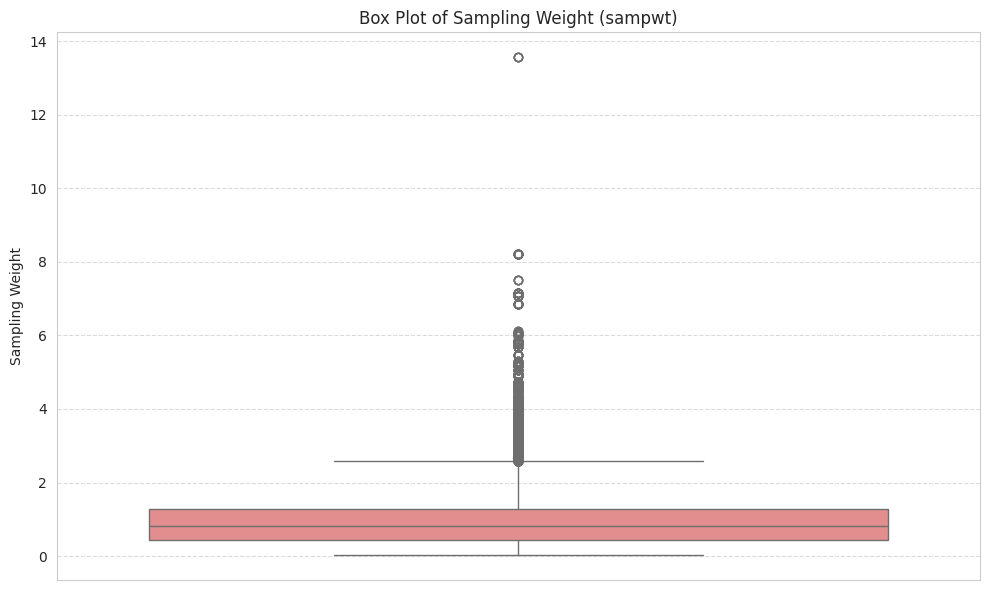

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['sampwt'], color='lightcoral')
plt.title('Box Plot of Sampling Weight (sampwt)')
plt.ylabel('Sampling Weight')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Data Preprocessing
Feature and Target Separation

In [23]:
# Define features (X) and target (y)
# Drop identifier columns and 'sampwt' as it's a weight, not a predictive feature for the model itself
X = df.drop(columns=['anc_timing', 'psu', 'new_psu', 'DHSCLUST', 'sampwt', 'newcaseid_1'])
y = df['anc_timing']

print("Features (X) and Target (y) separated.")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print("\nFirst 5 rows of X:")
print(X.head().to_markdown(index=False, numalign="left", stralign="left"))
print("\nFirst 5 rows of y:")
print(y.head().to_markdown(index=True, numalign="left", stralign="left")) # Keep index for y for clarity

Features (X) and Target (y) separated.
X shape: (42719, 8)
y shape: (42719,)

First 5 rows of X:
| country   | residence   | education_1          | birth_order   | wealth   | household_size_g   | household_sex   | age_group_new_cat   |
|:----------|:------------|:---------------------|:--------------|:---------|:-------------------|:----------------|:--------------------|
| DRC       | urban       | secondary and higher | one           | rich     | 5 or more          | male            | 15-24               |
| DRC       | urban       | secondary and higher | two           | rich     | 5 or more          | male            | 25-49               |
| DRC       | urban       | secondary and higher | one           | rich     | 5 or more          | female          | 15-24               |
| DRC       | urban       | secondary and higher | two           | rich     | 5 or more          | female          | 25-49               |
| DRC       | urban       | primary and lower    | one           | ri

Encoding Target Variable (anc_timing)

In [24]:
# Encode the target variable 'anc_timing' to numerical (0 for 'early', 1 for 'late')
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Target variable 'anc_timing' encoded to numerical values.")
print(f"Original classes: {label_encoder.classes_}")
print(f"Encoded values (first 5): {y_encoded[:5]}")
print(f"Mapping: early -> {label_encoder.transform(['early'])[0]}, late -> {label_encoder.transform(['late'])[0]}")

Target variable 'anc_timing' encoded to numerical values.
Original classes: ['early' 'late']
Encoded values (first 5): [0 1 0 1 1]
Mapping: early -> 0, late -> 1


Identifying Categorical Features for One-Hot Encoding

In [25]:
# Identify categorical columns that need One-Hot Encoding
categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"Categorical features identified for One-Hot Encoding: {categorical_features}")

Categorical features identified for One-Hot Encoding: ['country', 'residence', 'education_1', 'birth_order', 'wealth', 'household_size_g', 'household_sex', 'age_group_new_cat']


One-Hot Encoding Categorical Features and Applying to Data

In [26]:
# Create a ColumnTransformer to apply OneHotEncoder to categorical features
# and leave other columns (if any numerical were present) untouched.
# In this specific dataset, all remaining X features are categorical.
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns (numerical, if any) as they are
)

# Apply the preprocessing
X_processed = preprocessor.fit_transform(X)

# Convert the processed data back to a DataFrame with appropriate column names
# Get feature names after one-hot encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
# If there were 'passthrough' columns, add them here. For this dataset, it's just OHE features.
X_processed_df = pd.DataFrame(X_processed, columns=ohe_feature_names)


print("Categorical features One-Hot Encoded successfully.")
print(f"Processed X shape: {X_processed_df.shape}")
print("\nFirst 5 rows of processed X:")
print(X_processed_df.head().to_markdown(index=False, numalign="left", stralign="left"))

Categorical features One-Hot Encoded successfully.
Processed X shape: (42719, 19)

First 5 rows of processed X:
| country_DRC   | country_KEN   | country_TZA   | residence_rural   | residence_urban   | education_1_primary and lower   | education_1_secondary and higher   | birth_order_3 or more   | birth_order_one   | birth_order_two   | wealth_middle   | wealth_poor   | wealth_rich   | household_size_g_4 or less   | household_size_g_5 or more   | household_sex_female   | household_sex_male   | age_group_new_cat_15-24   | age_group_new_cat_25-49   |
|:--------------|:--------------|:--------------|:------------------|:------------------|:--------------------------------|:-----------------------------------|:------------------------|:------------------|:------------------|:----------------|:--------------|:--------------|:-----------------------------|:-----------------------------|:-----------------------|:---------------------|:--------------------------|:--------------------------|
| 

Splitting Data into Training and Testing Sets

In [27]:
# Split the dataset into training and testing sets
# Using stratify=y_encoded to maintain the proportion of early/late ANC in both sets
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print("Data split into training and testing sets successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\nDistribution of target in training set:")
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

print("\nDistribution of target in testing set:")
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))

Data split into training and testing sets successfully.
X_train shape: (34175, 19)
X_test shape: (8544, 19)
y_train shape: (34175,)
y_test shape: (8544,)

Distribution of target in training set:
{np.int64(0): np.int64(13778), np.int64(1): np.int64(20397)}

Distribution of target in testing set:
{np.int64(0): np.int64(3444), np.int64(1): np.int64(5100)}


# Model Training:
## Random Forest Classifier

In [28]:
# Initialize and train the Random Forest Classifier
# Using a balanced class weight to handle the imbalance in 'anc_timing'
# random_state for reproducibility
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

print("Training Random Forest Classifier...")
rf_classifier.fit(X_train, y_train)
print("Random Forest Classifier trained successfully!")

Training Random Forest Classifier...
Random Forest Classifier trained successfully!


Model Evaluation

In [29]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1] # Probabilities for the 'late' class

print("\n--- Model Evaluation ---")

# Calculate common classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm, index=['Actual Early', 'Actual Late'], columns=['Predicted Early', 'Predicted Late']).to_markdown(numalign="left", stralign="left"))

# Classification Report
print("\nClassification Report:")
# Assuming 'early' is 0 and 'late' is 1 after LabelEncoding
target_names = ['early', 'late']
print(classification_report(y_test, y_pred, target_names=target_names))

# Interpretation note for thesis:
print("\n--- Interpretation Note for Thesis ---")
print("Given the class imbalance (more 'late' cases), Accuracy alone might be misleading.")
print("Focus on Precision, Recall, F1-Score, and especially ROC AUC to understand model performance,")
print("particularly in identifying the 'late' initiation cases (positive class).")
print("A high Recall for 'late' means the model is good at catching actual late cases,")
print("while high Precision means fewer false alarms for late initiation.")


--- Model Evaluation ---
Accuracy: 0.5792
Precision: 0.6580
Recall: 0.6145
F1-Score: 0.6355
ROC AUC Score: 0.5880

Confusion Matrix:
|              | Predicted Early   | Predicted Late   |
|:-------------|:------------------|:-----------------|
| Actual Early | 1815              | 1629             |
| Actual Late  | 1966              | 3134             |

Classification Report:
              precision    recall  f1-score   support

       early       0.48      0.53      0.50      3444
        late       0.66      0.61      0.64      5100

    accuracy                           0.58      8544
   macro avg       0.57      0.57      0.57      8544
weighted avg       0.59      0.58      0.58      8544


--- Interpretation Note for Thesis ---
Given the class imbalance (more 'late' cases), Accuracy alone might be misleading.
Focus on Precision, Recall, F1-Score, and especially ROC AUC to understand model performance,
particularly in identifying the 'late' initiation cases (positive class).


Feature Importance


--- Feature Importance from Random Forest Model ---
| Feature                          | Importance   |
|:---------------------------------|:-------------|
| birth_order_one                  | 0.0793378    |
| wealth_rich                      | 0.0762038    |
| country_TZA                      | 0.0751385    |
| country_KEN                      | 0.0696956    |
| education_1_secondary and higher | 0.0572104    |
| education_1_primary and lower    | 0.0510552    |
| residence_urban                  | 0.0497886    |
| household_sex_female             | 0.0495462    |
| wealth_poor                      | 0.0493572    |
| country_DRC                      | 0.0489606    |


/tmp/ipython-input-31-1519699261.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(15), palette='mako')


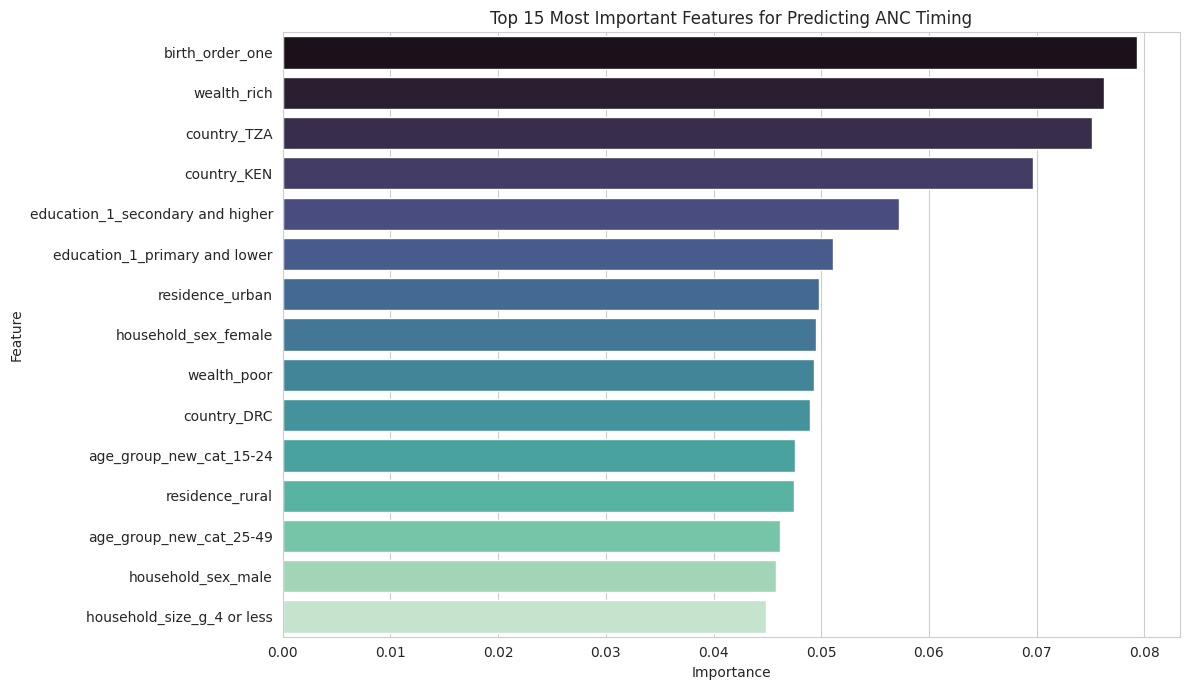

In [31]:
print("\n--- Feature Importance from Random Forest Model ---")

# Get feature importances
importances = rf_classifier.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df.head(10).to_markdown(index=False, numalign="left", stralign="left")) # Display top 10

# If you want to visualize feature importances, uncomment the lines below:

plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(15), palette='mako')
plt.title('Top 15 Most Important Features for Predicting ANC Timing')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Cell 24: Model Improvement - Hyperparameter Tuning for Random Forest**

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

print("Starting Hyperparameter Tuning for Random Forest Classifier...")

# Define the parameter distribution for RandomizedSearchCV
# This provides a range of values for n_estimators, max_features, max_depth, and min_samples_split
# class_weight is kept 'balanced' as it was helpful before
param_dist = {
    'n_estimators': randint(100, 500), # Number of trees in the forest
    'max_features': ['sqrt', 'log2', None], # Number of features to consider when looking for the best split
    'max_depth': randint(10, 50), # Maximum depth of the tree
    'min_samples_split': randint(2, 20), # Minimum number of samples required to split an internal node
    'class_weight': ['balanced', 'balanced_subsample'] # Strategies to handle imbalance
}

# Initialize the RandomizedSearchCV object
# n_iter: number of parameter settings that are sampled
# cv: number of folds in cross-validation
# scoring: metric to optimize (ROC AUC is good for imbalanced classification)
# verbose: controls the verbosity
# n_jobs: number of jobs to run in parallel (-1 means use all available processors)
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42), # Use RandomForestClassifier with a fixed random_state
    param_distributions=param_dist,
    n_iter=50, # Number of different combinations to try
    cv=5, # 5-fold cross-validation
    scoring='roc_auc', # Optimize for ROC AUC, suitable for imbalanced datasets
    verbose=2,
    random_state=42,
    n_jobs=-1 # Use all available cores
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

print("\nHyperparameter tuning complete!")
print(f"Best ROC AUC score found: {random_search.best_score_:.4f}")
print(f"Best parameters found: {random_search.best_params_}")

# Store the best estimator
best_rf_classifier = random_search.best_estimator_

Starting Hyperparameter Tuning for Random Forest Classifier...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Hyperparameter tuning complete!
Best ROC AUC score found: 0.5816
Best parameters found: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 14, 'n_estimators': 332}


Retrain and Re-evaluate Model with Best Parameters

In [34]:
print("\n--- Retraining and Re-evaluating Model with Best Parameters ---")

# Use the best estimator found by RandomizedSearchCV
# The best_rf_classifier is already trained on the best parameters
# We just need to make predictions with it and evaluate

# Make predictions on the test set using the best model
y_pred_tuned = best_rf_classifier.predict(X_test)
y_pred_proba_tuned = best_rf_classifier.predict_proba(X_test)[:, 1] # Probabilities for the 'late' class

# Calculate common classification metrics for the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

print(f"Accuracy (Tuned Model): {accuracy_tuned:.4f}")
print(f"Precision (Tuned Model): {precision_tuned:.4f}")
print(f"Recall (Tuned Model): {recall_tuned:.4f}")
print(f"F1-Score (Tuned Model): {f1_tuned:.4f}")
print(f"ROC AUC Score (Tuned Model): {roc_auc_tuned:.4f}")

# Confusion Matrix for the tuned model
print("\nConfusion Matrix (Tuned Model):")
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
print(pd.DataFrame(cm_tuned, index=['Actual Early', 'Actual Late'], columns=['Predicted Early', 'Predicted Late']).to_markdown(numalign="left", stralign="left"))

# Classification Report for the tuned model
print("\nClassification Report (Tuned Model):")
target_names = ['early', 'late'] # Assuming 'early' is 0 and 'late' is 1
print(classification_report(y_test, y_pred_tuned, target_names=target_names))

print("\n--- Comparison and Thesis Note ---")
print("Compare these metrics with the initial model's performance.")
print("If the ROC AUC, F1-Score, and Recall for the 'late' class have improved,")
print("it indicates that hyperparameter tuning has made the model better at identifying delayed ANC cases.")


--- Retraining and Re-evaluating Model with Best Parameters ---
Accuracy (Tuned Model): 0.5792
Precision (Tuned Model): 0.6575
Recall (Tuned Model): 0.6161
F1-Score (Tuned Model): 0.6361
ROC AUC Score (Tuned Model): 0.5907

Confusion Matrix (Tuned Model):
|              | Predicted Early   | Predicted Late   |
|:-------------|:------------------|:-----------------|
| Actual Early | 1807              | 1637             |
| Actual Late  | 1958              | 3142             |

Classification Report (Tuned Model):
              precision    recall  f1-score   support

       early       0.48      0.52      0.50      3444
        late       0.66      0.62      0.64      5100

    accuracy                           0.58      8544
   macro avg       0.57      0.57      0.57      8544
weighted avg       0.59      0.58      0.58      8544


--- Comparison and Thesis Note ---
Compare these metrics with the initial model's performance.
If the ROC AUC, F1-Score, and Recall for the 'late' class 

##Logistic Regression (Baseline Model)

In [1]:
from sklearn.linear_model import LogisticRegression

print("Training Logistic Regression Model...")

# Initialize Logistic Regression Classifier
# Using 'liblinear' solver for L1/L2 regularization and 'balanced' class_weight
# Max_iter increased to ensure convergence
lr_classifier = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced', max_iter=1000)

lr_classifier.fit(X_train, y_train)
print("Logistic Regression Model trained successfully!")

Training Logistic Regression Model...


NameError: name 'X_train' is not defined